# Wine Dataset Classifier Using Decision Tree Algorithm

## Introduction
This project focuses on building a classifier for the Wine dataset using the Decision Tree algorithm. The Wine dataset is a classic machine learning dataset that contains various attributes of different types of wines. Our goal is to develop a model that can accurately classify wines into their respective classes based on these attributes.

### Dataset Description
The Wine dataset consists of 178 samples, each representing a different wine. There are 13 attributes or features for each wine, including measurements related to alcohol content, acidity, phenols, and more. The target variable is the class label, indicating which of three different cultivars the wine belongs to.

### Decision Tree Algorithm
Decision Tree is a powerful and interpretable algorithm widely used for classification tasks. It works by recursively partitioning the data based on the feature that provides the best split at each node. This results in a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents a class label.


### Required Libraries
- pandas: For data manipulation and analysis.
- scikit-learn: For machine learning algorithms and evaluation metrics.
- matplotlib: For plotting the decision tree.
- seaborn: For enhanced visualization.

## Importing Essential Libraries

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Wine Dataset into a Pandas DataFrame


The code `pd.read_csv("Wine.csv", names=['Cultivars', 'Alcohol', ...])` reads the CSV file named "Wine.csv" into a pandas DataFrame named `df`. By using the `names` parameter, we explicitly specify the column names to ensure accurate labeling of the dataset columns.



In [35]:
df= pd.read_csv("Wine.csv", names= [ 'Cultivars','Alcohol', 'Malic acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315 of diluted wines','Proline'])
df.head()

,Cultivars,Alcohol,Malic acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



### Separating Features and Target Variable


The code below is used to separate the features and the target variable in the Wine dataset:



In [36]:

X = df.drop('Cultivars', axis=1)  
y = df['Cultivars']  

### Plotting the Distribution of Classes


The code snippet below generates a countplot to visualize the distribution of classes in the Wine dataset:



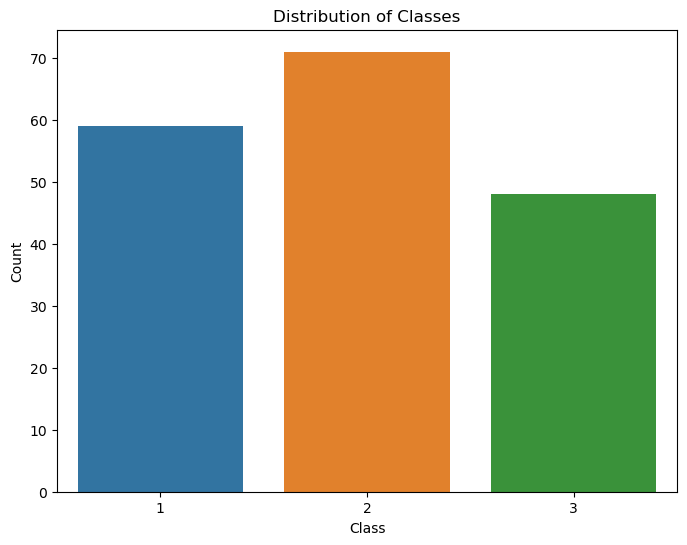

In [37]:
# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Cultivars', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Plotting the Covariance Matrix Heatmap

The code snippet below generates a heatmap to visualize the covariance matrix of the features in the Wine dataset:


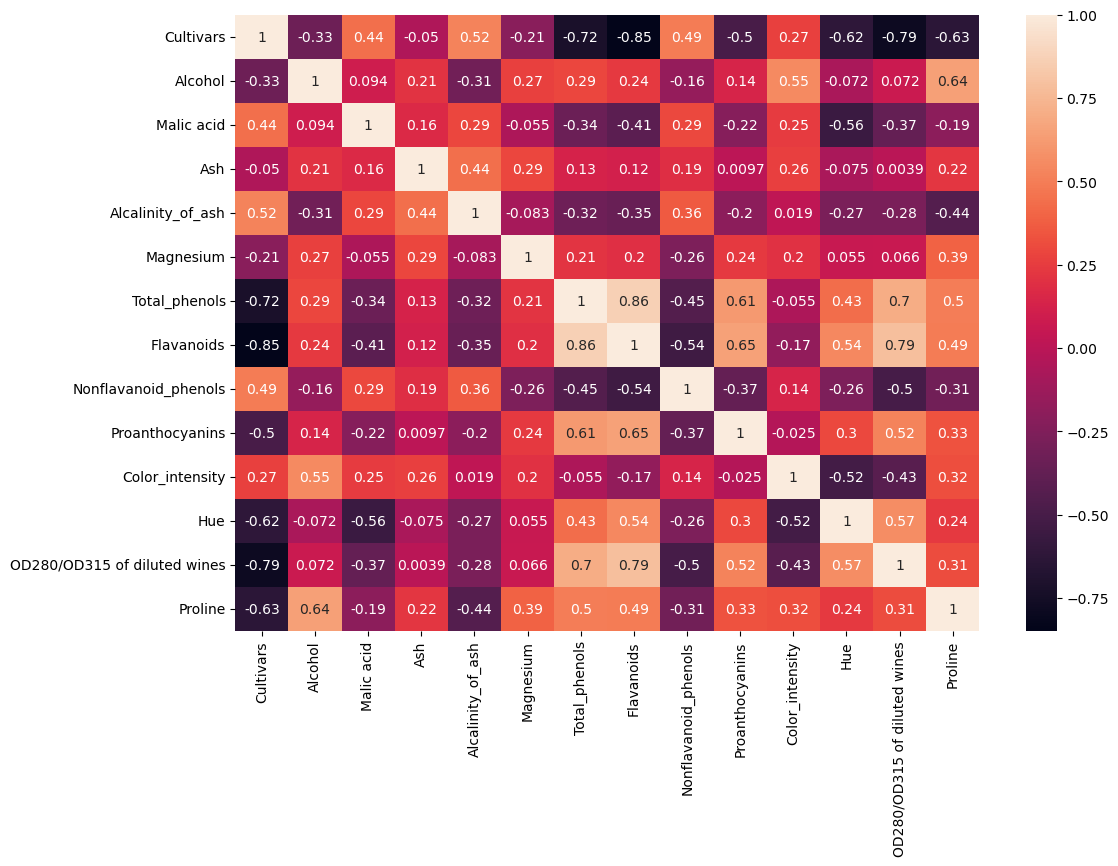

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Calculating Correlation and Identifying Relevant Features

The following code calculates the correlation of features with the target variable ('Cultivars') in the Wine dataset and identifies relevant features with a correlation coefficient greater than 0.4:
### Understanding Correlation Coefficient

#### Correlation Strength and Direction
The correlation coefficient measures the strength and direction of the linear relationship between two variables. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.

#### Relevance of Correlation Coefficient in Feature Selection
In this case, we consider features with a correlation coefficient greater than 0.4 as relevant because they have a moderately strong linear relationship with the target variable ('Cultivars'). This threshold is chosen to focus on features that may have a more significant impact on predicting or understanding the target variable.

#### Importance of Threshold Selection
Features with a correlation coefficient less than 0.4 are excluded because they may have weaker or negligible linear relationships with the target variable, making them less influential in predicting or explaining variations in the target variable.


In [39]:
correlation= df.corr()

correlation_target = abs(correlation["Cultivars"])

relevant_features = correlation_target[correlation_target>0.4]
relevant_features

Cultivars                       1.000000
Malic acid                      0.437776
Alcalinity_of_ash               0.517859
Total_phenols                   0.719163
Flavanoids                      0.847498
Nonflavanoid_phenols            0.489109
Proanthocyanins                 0.499130
Hue                             0.617369
OD280/OD315 of diluted wines    0.788230
Proline                         0.633717
Name: Cultivars, dtype: float64

# Visualizing Relationships with Pairplot

## Explanation
The pairplot visualization technique is used to observe pairwise relationships between selected features in the Wine dataset. This allows us to uncover patterns and correlations across different combinations of features.

## Importance of Color Differentiation
The color differentiation based on the 'Cultivars' class in the pairplot helps in understanding how these features vary across different wine cultivar types. This color coding enables us to visually inspect how the selected features contribute to distinguishing between different types of wine cultivars.

## Interpretation of Results
Analyzing the pairplot can provide insights into which combinations of features exhibit strong correlations or patterns. This information is valuable for feature selection and understanding the underlying factors influencing wine cultivar classification.

## Visualization
The pairplot visualizes relationships between the following selected features:
- Alcalinity_of_ash
- Total_phenols
- Flavanoids
- Hue
- OD280/OD315 of diluted wines
- Proline

The color differentiation based on 'Cultivars' class helps in understanding feature variations across different wine cultivar types.

## Conclusion
The pairplot serves as an effective exploratory tool, providing valuable insights into feature relationships and their impact on wine cultivar classification.


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


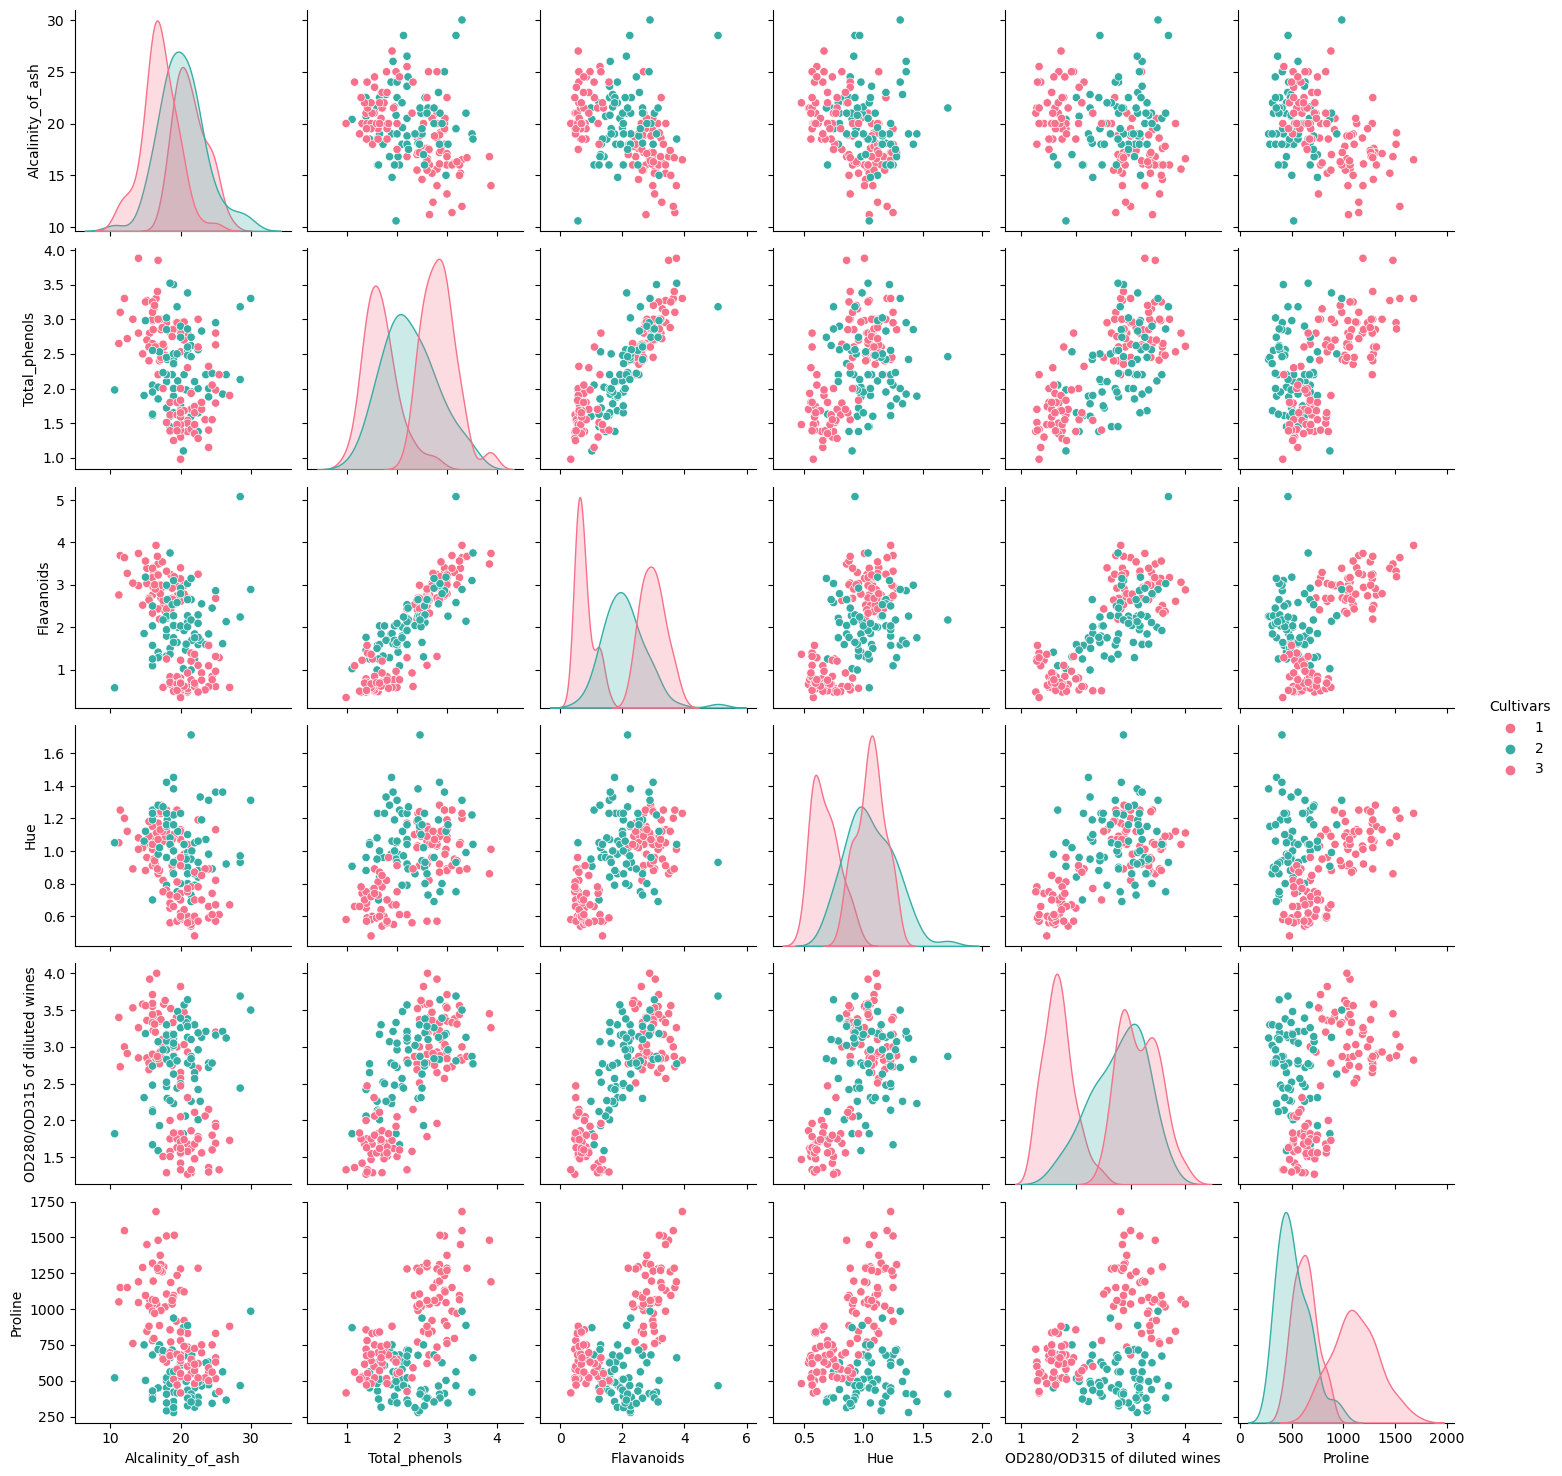

In [40]:
i = sns.pairplot(df, vars = ['Alcalinity_of_ash', 'Total_phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] ,hue='Cultivars', palette='husl')
plt.show()

### Feature Selection and Data Splitting

#### Relevant Features Selection
We start by selecting relevant features from the Wine dataset, which are important for our model. The selected relevant features are:
- Alcohol
- Flavanoids
- Color_intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

In [41]:
relevant_features = ['Alcohol', 'Flavanoids', 'Color_intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X = df[relevant_features]
y = df['Cultivars'] 


# Data Splitting Using train_test_split

## Explanation
In this step, we split the data into training, validation, and testing sets using the `train_test_split` function from scikit-learn. This process is crucial for training and evaluating machine learning models effectively.

### Splitting Strategy
We use a test size of 20% for the test set, which means 20% of the data will be reserved for testing the model's performance. The remaining data is further split into training and validation sets with a 75:25 ratio. This splitting strategy helps in training the model on a larger portion of the data while also having a separate validation set to assess the model's performance before final testing.

In [42]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) 

### Initializing and Fitting a Decision Tree Classifier

#### Explanation
- **DecisionTreeClassifier():** This line initializes a Decision Tree classifier object, which is a machine learning algorithm used for classification tasks.

- **model.fit(X_train, y_train):** This line fits the Decision Tree classifier to the training data (`X_train` and `y_train`). The model learns patterns and relationships in the training data to make predictions on unseen data.

#### Model Training
The `fit()` method trains the Decision Tree classifier using the training data, where `X_train` contains the features and `y_train` contains the corresponding target labels ('Cultivars' in this case). The model uses this training process to create a predictive model based on the input features and their corresponding labels.

#### Conclusion
After fitting the model to the training data, the Decision Tree classifier is ready to make predictions on new or unseen data based on the learned patterns from the training process.


In [43]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction Process

#### predict() Method
The `predict()` method applies the learned patterns and relationships from the training data to make predictions on new or unseen data.

#### Prediction for Validation Data
In this case, it predicts the target labels ('Cultivars') for the validation dataset based on the features in `X_val`.


In [44]:
y_val_pred = model.predict(X_val)

### Calculating Validation Accuracy

The following code snippet calculates the validation accuracy using the `accuracy_score` function and displays the result:

In [45]:
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val}')

Validation Accuracy: 0.9444444444444444


### Prediction for Test Data


The following code snippet predicts the target labels ('Cultivars') for the test dataset (`X_test`) based on the learned patterns from the training data:




In [46]:
y_test_pred = model.predict(X_test)

### Calculating Test Accuracy

#### Explanation
The following code snippet calculates the test accuracy using the `accuracy_score` function and displays the result:

In [47]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test}')

Test Accuracy: 0.9722222222222222


# Printing Classification Report


# Explanation of Metrics

## Precision
Precision measures the proportion of true positive predictions among all positive predictions made by the model. It indicates the model's ability to avoid false positives.


Precision = True Positives / (True Positives + False Positives)
## Recall (Sensitivity)

Recall, also known as Sensitivity or True Positive Rate, measures the proportion of true positive predictions among all actual positive instances in the data. It indicates the model's ability to capture all positive instances without missing any (false negatives).

Recall is calculated using the following formula:

Recall = True Positives / (True Positives + False Negatives)
## F1-score

The F1-score is a metric that combines both precision and recall into a single value. It is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives. A higher F1-score indicates better overall performance of a model.

The F1-score is calculated using the following formula:

F1-score = 2 * (Precision * Recall) / (Precision + Recall)
## Support

Support refers to the number of actual occurrences of each class in the test data. It represents the distribution of classes and provides context for interpreting precision, recall, and F1-score metrics.

For each class in a classification problem, the support value indicates how many instances of that class exist in the test dataset. Support is essential because:

- It helps in understanding the imbalance or balance of classes in the dataset.
- It provides context for evaluating the performance of the model for each class.
- It can impact the interpretation of precision, recall, and F1-score metrics, especially in imbalanced datasets where some classes may have significantly fewer instances than others.

Support is not directly calculated as a metric like precision, recall, or F1-score. Instead, it is derived from the actual distribution of classes in the test dataset and is often included as part of the classification report when evaluating a machine learning model's performance.


In [88]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



### Visualizing the Decision Tree

#### Code Explanation
The following code snippet visualizes the decision tree using the `plot_tree` function from matplotlib:

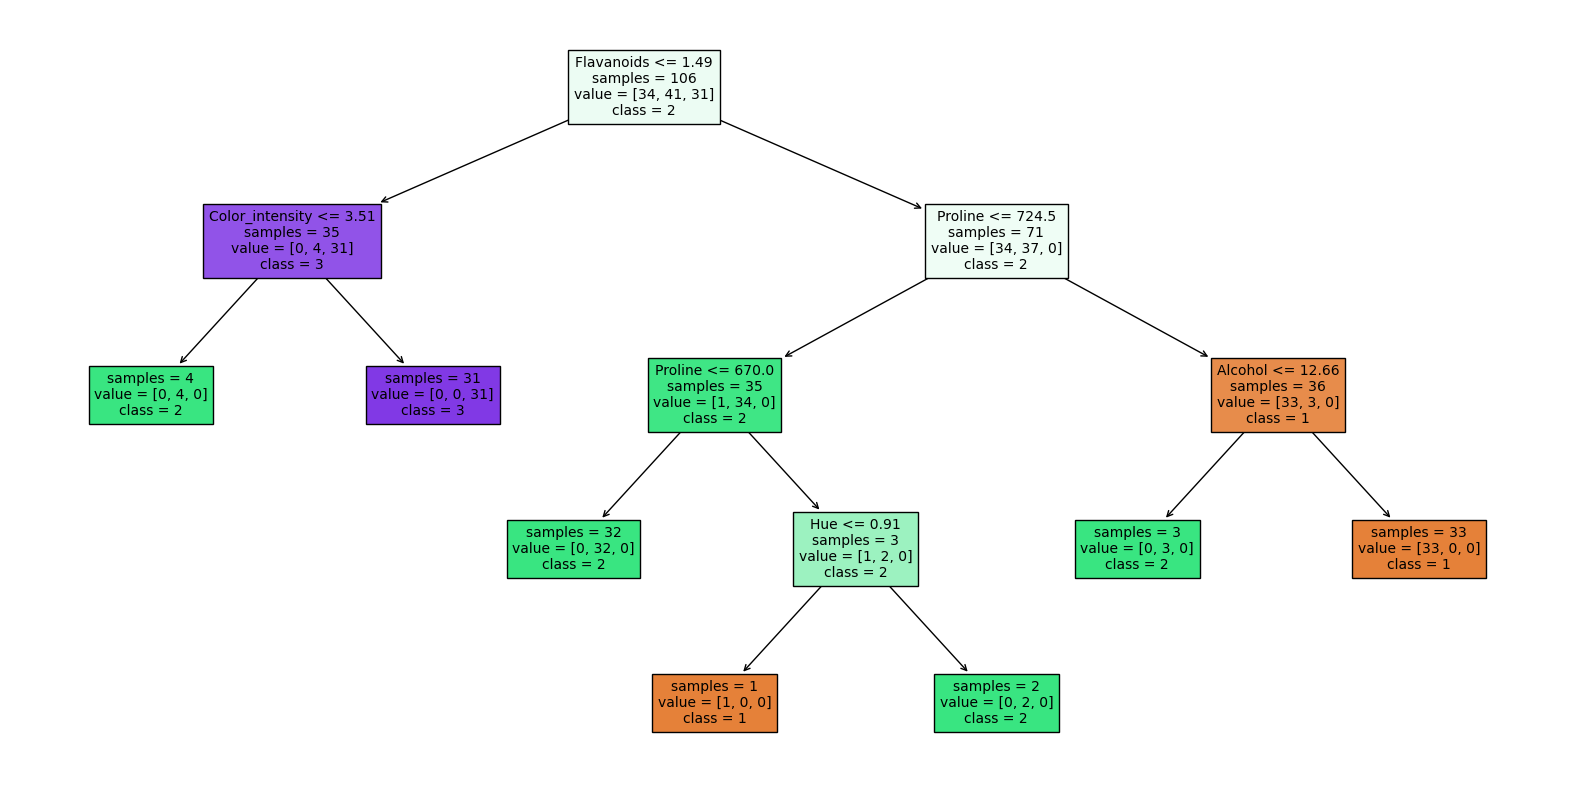

In [89]:

class_names_str = [str(cls) for cls in df['Cultivars'].unique().tolist()]

plt.figure(figsize=(20, 10))  
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=class_names_str, impurity=False, fontsize=10)
plt.show()


## Conclusion

Our wine dataset project achieved an impressive accuracy of 97.22% using a Decision Tree classifier to predict wine cultivar types. Through thorough data preprocessing, model training, and testing, we demonstrated the model's capability to accurately classify wine samples based on various features. This project underscores the effectiveness of machine learning algorithms in classifying complex datasets and highlights the importance of data preparation and model evaluation in achieving reliable predictions. Moving forward, our model can be further refined and applied in real-world scenarios to enhance cultivar classification in the wine industry.
